In [65]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt



def get_data(n, d):
    x = torch.randn(n, d)
    y = torch.relu(x[:,0])
    return x, y


class Network(nn.Module):
    def __init__(self, d, m, mf=False):
        """
        INPUT: d   -> input dimension
               m   -> the network width
               mf  -> use the mean-field scaling if true 
        """
        super(Network, self).__init__()
        a = torch.zeros(m)
        B = torch.randn(d, m)
        B /= B.norm(dim=0, keepdim=True)

        self.a = nn.Parameter(a)
        self.B = nn.Parameter(B)
        
        self.width = m
        self.mf = mf

    def forward(self, x):
        Bx = x.matmul(self.B)
        ac = torch.relu(Bx)
        a_sigma_Bx = ac.matmul(self.a)
        if self.mf:
            a_sigma_Bx /= self.width
            
        return a_sigma_Bx.squeeze()
    
    
def evaluate_loss(model, x, y):
    """
    Calculate the quadratic loss
    """
    y_p = model(x)
    dy = y_p - y
    loss = dy.pow(2).mean()
    return loss

## Experiment setting

- $n=100$: the number of training samples
- $d=10$: The input dimension
- $m=20$: The network width

Here we use Adam to speed up the training. The same phenomenon is also observed for GD. 

In [92]:
d = 10
m = 20
n_tr = 100   
n_te = 10000

x_tr, y_tr = get_data(n_tr, d)
x_te, y_te = get_data(n_te, d)

model = Network(d, m, mf=True)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5*m)

In [93]:
nsteps = 12000
loss_tr_traj = []
loss_te_traj = []
for i in range(nsteps):
    optimizer.zero_grad()
    loss_tr = evaluate_loss(model, x_tr, y_tr)
    loss_tr.backward()
    optimizer.step()
    
    if i%400 == 0:
        loss_te = evaluate_loss(model, x_te, y_te)
        print('{:}/{:}, loss_tr: {:.1e}, loss_te: {:.1e}'.
              format(i, nsteps, loss_tr.item(), loss_te.item()))
        loss_tr_traj.append(loss_tr.item())
        loss_te_traj.append(loss_te.item())

0/12000, loss_tr: 5.9e-01, loss_te: 4.8e-01
400/12000, loss_tr: 2.2e-01, loss_te: 2.4e-01
800/12000, loss_tr: 5.9e-02, loss_te: 1.2e-01
1200/12000, loss_tr: 9.8e-03, loss_te: 4.3e-02
1600/12000, loss_tr: 2.3e-03, loss_te: 1.5e-02
2000/12000, loss_tr: 8.8e-04, loss_te: 6.9e-03
2400/12000, loss_tr: 4.4e-04, loss_te: 3.8e-03
2800/12000, loss_tr: 2.4e-04, loss_te: 2.2e-03
3200/12000, loss_tr: 1.2e-04, loss_te: 1.2e-03
3600/12000, loss_tr: 4.4e-05, loss_te: 7.6e-04
4000/12000, loss_tr: 1.6e-05, loss_te: 5.4e-04
4400/12000, loss_tr: 7.0e-06, loss_te: 4.4e-04
4800/12000, loss_tr: 3.3e-06, loss_te: 3.8e-04
5200/12000, loss_tr: 1.7e-06, loss_te: 3.4e-04
5600/12000, loss_tr: 7.8e-07, loss_te: 3.2e-04
6000/12000, loss_tr: 3.5e-07, loss_te: 3.0e-04
6400/12000, loss_tr: 1.5e-07, loss_te: 2.9e-04
6800/12000, loss_tr: 5.7e-08, loss_te: 2.8e-04
7200/12000, loss_tr: 2.2e-08, loss_te: 2.7e-04
7600/12000, loss_tr: 8.4e-09, loss_te: 2.7e-04
8000/12000, loss_tr: 3.2e-09, loss_te: 2.7e-04
8400/12000, loss_t

Text(0, 0.5, 'Loss')

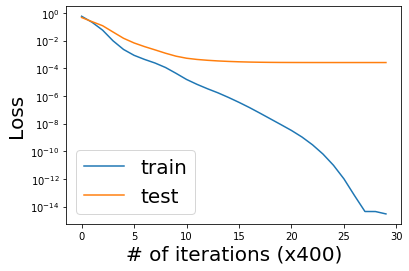

In [94]:
plt.semilogy(loss_tr_traj,'-', label='train')
plt.semilogy(loss_te_traj,'-', label='test')
plt.legend(fontsize=20)
plt.xlabel('# of iterations (x400)', fontsize=20)
plt.ylabel('Loss', fontsize=20)